## Modèle Baseline

In [2]:
import tensorflow as tf
from keras.datasets import fashion_mnist  
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
import datetime
import os

# Charger le dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Encodage One-hot des labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modèle "Baseline"
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')       
])

# Compiler le modèle
# On utilise SGD optimiseur de base
model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# TensorBoard callback
log_dir = os.path.join(r"C:\Users\Moi\Documents\tensorboard", "fit_baseline_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

print(f"Entraînement lancé... Logs enregistrés dans : {log_dir}")
# Entraînement du modèle
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

# Évaluer le modèle
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Baseline Loss : {loss:.4f}")
print(f"Baseline Accuracy : {accuracy:.4f}")

c:\ProgramData\miniconda3\envs\test\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entraînement lancé... Logs enregistrés dans : C:\Users\Moi\Documents\tensorboard\fit_baseline_20260208-024326
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7595 - loss: 0.7380 - val_accuracy: 0.8092 - val_loss: 0.5655
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8291 - loss: 0.5082 - val_accuracy: 0.8277 - val_loss: 0.4999
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8401 - loss: 0.4640 - val_accuracy: 0.8360 - val_loss: 0.4743
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8491 - loss: 0.4395 - val_accuracy: 0.8387 - val_loss: 0.4603
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8525 - loss: 0.4218 - val_accuracy: 0.8388 - val_loss: 0.4509
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8588 - loss: 0.4080 - val_accuracy: 0.8444 - val_loss: 0.4375
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8604 - loss: 0.3970 - val_accuracy: 0.8481

## Modèle Avancé

In [3]:
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import Adam

# On augmente la capacité (256 neurones) et on ajoute les techniques de régularisation
model_advanced = Sequential([
    Flatten(input_shape=(28, 28, 1)),

    # Couche cachée 1
    Dense(256, activation='relu'),       
    BatchNormalization(),      # Normalisation par lot pour stabiliser et accélérer l'entraînement
    Dropout(0.3),    # Éteint 30% des neurones aléatoirement pour éviter le surapprentissage

    # Couche cachée 2
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Couche de sortie
    Dense(10, activation='softmax')
])

# optimisation avec Adam
model_advanced.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# TensorBoard callback pour le modèle avancé
log_dir_advanced = os.path.join(r"C:\Users\Moi\Documents\tensorboard", "fit_advanced_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback_advanced = TensorBoard(log_dir=log_dir_advanced, histogram_freq=1)

print("Entraînement du modèle AVANCÉ lancé...")

# Entraînement du challenger
model_advanced.fit(
    x_train, y_train,
    epochs=10,           # Même nombre d'époques pour une comparaison juste
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback_advanced]
)

# Évaluer le modèle avancé
loss, accuracy = model_advanced.evaluate(x_test, y_test, verbose=1)
print(f"Advanced Model Accuracy : {accuracy:.4f}")

Entraînement du modèle AVANCÉ lancé...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7945 - loss: 0.5816 - val_accuracy: 0.8187 - val_loss: 0.4824
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8360 - loss: 0.4599 - val_accuracy: 0.8503 - val_loss: 0.4064
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8396 - loss: 0.4507 - val_accuracy: 0.8549 - val_loss: 0.3997
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8467 - loss: 0.4285 - val_accuracy: 0.8581 - val_loss: 0.3994
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8489 - loss: 0.4166 - val_accuracy: 0.8569 - val_loss: 0.3881
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8539 - loss: 0.4066 - val_accuracy: 0.8575 - val_loss: 0.3837
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8566 - loss: 0.3964 - val_accuracy: 0.8615 - val_loss: 0.3753
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5

## Matrice de Confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


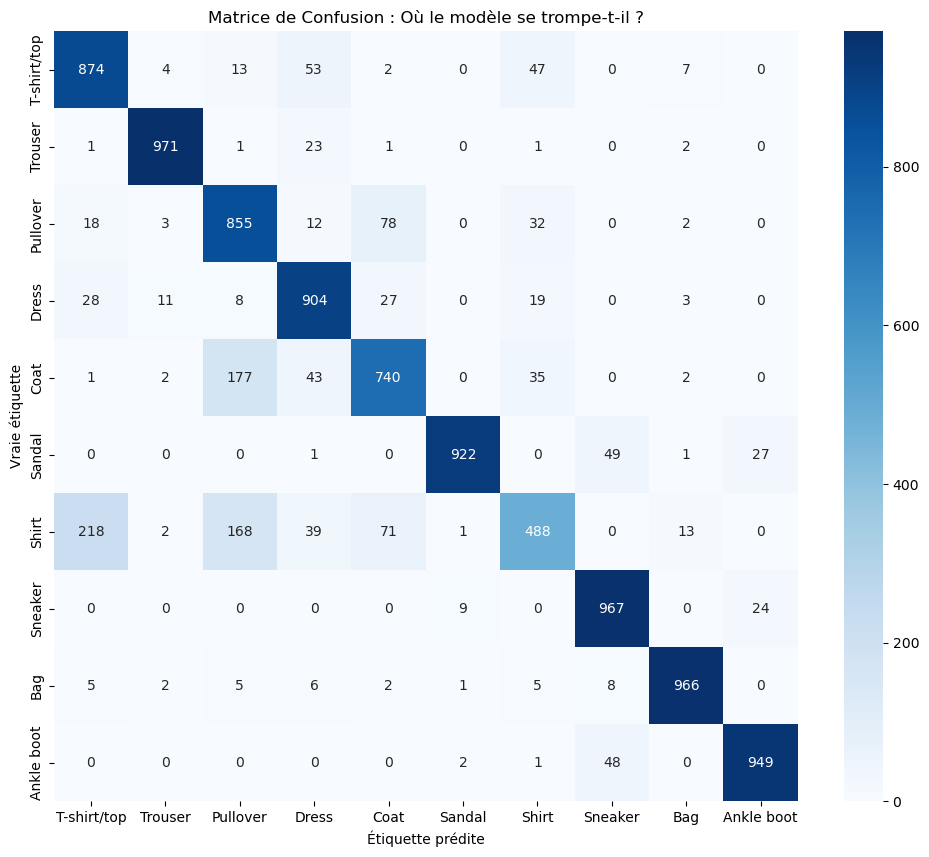

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prédictions sur tout le dataset de test
# Le modèle sort des probabilités (Softmax), on prend l'index du max (Argmax)
y_prob = model_advanced.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Définition des noms des classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Afficher le graphique "Heatmap"
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Matrice de Confusion : Où le modèle se trompe-t-il ?')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

## tensorboard --logdir

## PARTIE 2 : Approche Deep Learning avec CNN

In [9]:


# 1. On redimensionne les images pour le CNN : (N_images, 28, 28, 1)
# Le '1' signifie "Niveaux de gris" (Grayscale)
X_train_cnn = x_train.reshape(-1, 28, 28, 1)
X_test_cnn = x_test.reshape(-1, 28, 28, 1)

print(f"Nouvelle forme pour le CNN : {X_train_cnn.shape}")

Nouvelle forme pour le CNN : (60000, 28, 28, 1)


In [19]:
from tensorflow.keras import layers, models

# Création du modèle CNN
model_cnn = models.Sequential([
    # --- Partie Extraction des Features (L'œil du modèle) ---
    
    # Couche 1 : 32 filtres de 3x3 pixels
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)), # On divise la taille par 2
    
    # Couche 2 : 64 filtres (pour voir des formes plus complexes)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Couche 3 : Encore plus de profondeur
    layers.Conv2D(64, (3, 3), activation='relu'),

    # --- Partie Classification (Le Cerveau du modèle) ---
    layers.Flatten(), # Passage de la 3D à la 1D
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes de sortie
])

# Compilation
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_cnn.summary()

c:\ProgramData\miniconda3\envs\test\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Entraînement sur 10 époques (comme le précédent)
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=10, 
                            validation_data=(X_test_cnn, y_test)) 

# Évaluation finale
test_loss, test_acc = model_cnn.evaluate(X_test_cnn,  y_test, verbose=2)
print(f"\nPrécision finale du CNN : {test_acc*100:.2f}%")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8077 - loss: 0.5235 - val_accuracy: 0.8708 - val_loss: 0.3724
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8804 - loss: 0.3305 - val_accuracy: 0.8828 - val_loss: 0.3436
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8967 - loss: 0.2824 - val_accuracy: 0.8932 - val_loss: 0.3036
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9080 - loss: 0.2499 - val_accuracy: 0.9030 - val_loss: 0.2706
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9170 - loss: 0.2261 - val_accuracy: 0.9008 - val_loss: 0.2784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9241 - loss: 0.2065 - val_accuracy: 0.8925 - val_loss: 0.2912
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9307 - loss: 0.1871 - val_accuracy: 0.9060 - val_loss: 0.2612
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9365 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


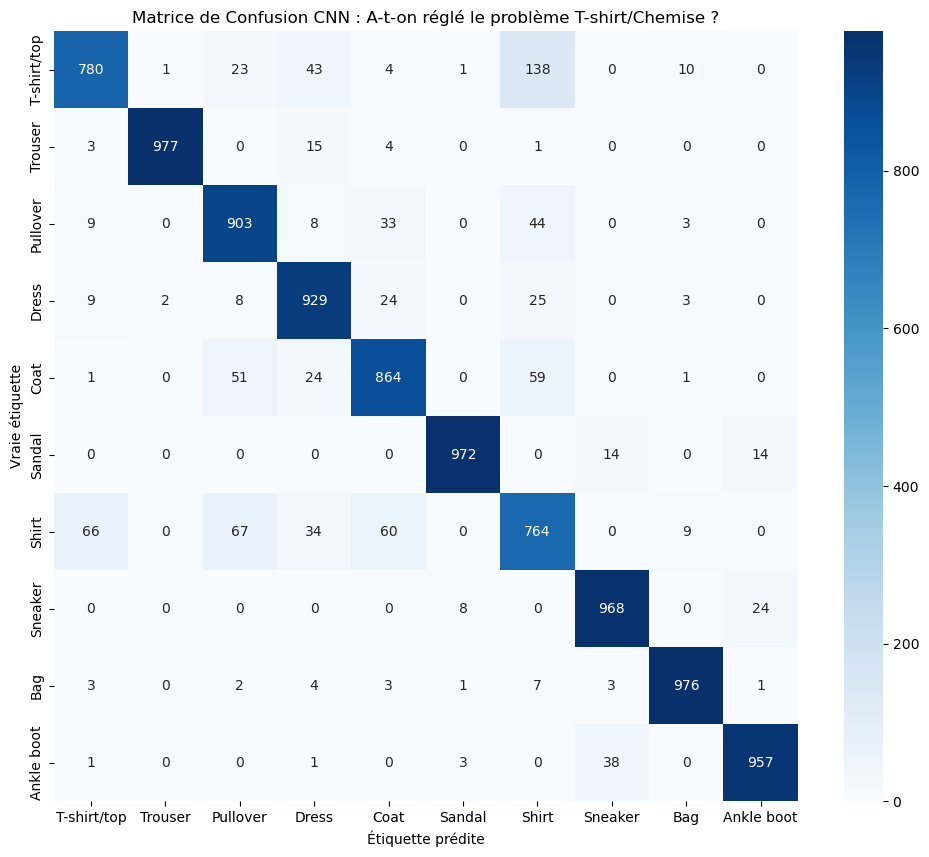

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- ADAPTATION POUR LE CNN ---
# On utilise 'model_cnn' et les données 'X_test_cnn'
y_prob_cnn = model_cnn.predict(X_test_cnn) 
y_pred_cnn = np.argmax(y_prob_cnn, axis=1)
y_true = np.argmax(y_test, axis=1)
# ------------------------------

# Définition des noms des classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_cnn)

# Afficher le graphique "Heatmap"
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Matrice de Confusion CNN : A-t-on réglé le problème T-shirt/Chemise ?')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()